In [16]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import regularizers
import numpy as np
import time
import matplotlib.pyplot as plt

In [17]:
learning_rate = 0.001
epochs = 30 
batch_size = 120

dataset = mnist.load_data()
(x_train, y_train), (x_test, y_test) = dataset

x_trainv = x_train.reshape(60000, 784)
x_testv = x_test.reshape(10000, 784)
x_trainv = x_trainv.astype('float32')
x_testv = x_testv.astype('float32')

x_trainv /= 255
x_testv /= 255 # tenía un error 

num_classes = 10
y_trainc = keras.utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.to_categorical(y_test, num_classes)

In [18]:
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 512)               401920    
                                                                 
 dense_18 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=learning_rate), metrics=['accuracy'])


In [20]:
history = model.fit(x_trainv, y_trainc,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )

Epoch 1/30
500/500 [==============================] - 4s 8ms/step - loss: 2.2634 - accuracy: 0.2392 - val_loss: 2.2051 - val_accuracy: 0.3554
Epoch 2/30
500/500 [==============================] - 3s 7ms/step - loss: 2.1669 - accuracy: 0.4225 - val_loss: 2.1215 - val_accuracy: 0.4855
Epoch 3/30
500/500 [==============================] - 4s 7ms/step - loss: 2.0867 - accuracy: 0.5264 - val_loss: 2.0418 - val_accuracy: 0.5768
Epoch 4/30
500/500 [==============================] - 4s 7ms/step - loss: 2.0097 - accuracy: 0.5946 - val_loss: 1.9645 - val_accuracy: 0.6322
Epoch 5/30
500/500 [==============================] - 4s 7ms/step - loss: 1.9356 - accuracy: 0.6357 - val_loss: 1.8904 - val_accuracy: 0.6571
Epoch 6/30
500/500 [==============================] - 4s 7ms/step - loss: 1.8643 - accuracy: 0.6639 - val_loss: 1.8193 - val_accuracy: 0.6824
Epoch 7/30
500/500 [==============================] - 4s 9ms/step - loss: 1.7956 - accuracy: 0.6852 - val_loss: 1.7507 - val_accuracy: 0.7015
Epoch 

# Ahora recreamos la red como la básica que teníamos:

In [15]:
learning_rate = 0.07 # La original la corrí con los siguientes valores
epochs = 15 
batch_size = 10

dataset = mnist.load_data()
(x_train, y_train), (x_test, y_test) = dataset

x_trainv = x_train.reshape(60000, 784)
x_testv = x_test.reshape(10000, 784)
x_trainv = x_trainv.astype('float32')
x_testv = x_testv.astype('float32')

x_trainv /= 255
x_testv /= 255

num_classes = 10
y_trainc = keras.utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.to_categorical(y_test, num_classes)
 
model = Sequential()
model.add(Dense(30, activation='sigmoid', input_shape=(784,)))
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=learning_rate), metrics=['accuracy'])
inicio = time.time()
history = model.fit(x_trainv, y_trainc,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )
fin = time.time()
test_loss, test_acc = model.evaluate(x_testv, y_testc, verbose=0)
print("Efectividad del modelo: ", round((test_acc * 100), 2), "%")
print("Tiempo entrenando: ",round(fin-inicio, 4),"s")
# La primer red (basica) me dió un 72% de efectividad en 135,5 s

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 30)                23550     
                                                                 
 dense_16 (Dense)            (None, 10)                310       
                                                                 
Total params: 23860 (93.20 KB)
Trainable params: 23860 (93.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
6000/6000 [==============================] - 13s 2ms/step - loss: 0.2075 - accuracy: 0.7333 - val_loss: 0.1356 - val_accuracy: 0.8546
Epoch 2/15
6000/6000 [==============================] - 13s 2ms/step - loss: 0.1138 - accuracy: 0.8671 - val_loss: 0.0948 - val_accuracy: 0.8870
Epoch 3/15
6000/6000 [==============================] - 12s 2ms/step - loss: 0.0880 - accuracy: 0.8878 - val_loss: 0.0785 - 

# A) Implementaciones para la RNA Secuencial.


### 1er Experimento: 
 - Cambiamos la función de activación (Sigmoide -> Relu)
 - Aumentamos las neuronas ocultas (50).
 - Disminuimos el tamaño del LearningRate (0.07 -> 0.001)
 - También se aumentó el tamaño del minibatch. (10 -> 70)
 - Neuronas de capa oculta: 50

In [22]:
learning_rate = 0.001
epochs = 20
batch_size = 70

dataset = mnist.load_data()
(x_train, y_train), (x_test, y_test) = dataset

x_trainv = x_train.reshape(60000, 784)
x_testv = x_test.reshape(10000, 784)
x_trainv = x_trainv.astype('float32')
x_testv = x_testv.astype('float32')

x_trainv /= 255
x_testv /= 255

num_classes = 10
y_trainc = keras.utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.to_categorical(y_test, num_classes)
 
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=learning_rate), metrics=['accuracy'])

inicio = time.time()
history = model.fit(x_trainv, y_trainc,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )
fin = time.time()
test_loss, test_acc = model.evaluate(x_testv, y_testc, verbose=0)
print("Efectividad del modelo: ", round((test_acc * 100), 2), "%")
print("Tiempo entrenando: ",round(fin-inicio, 4),"s")


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 50)                39250     
                                                                 
 dense_22 (Dense)            (None, 10)                510       
                                                                 
Total params: 39760 (155.31 KB)
Trainable params: 39760 (155.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
858/858 [==============================] - 3s 3ms/step - loss: 0.5854 - accuracy: 0.1528 - val_loss: 0.4838 - val_accuracy: 0.2033
Epoch 2/20
858/858 [==============================] - 2s 3ms/step - loss: 0.4256 - accuracy: 0.2269 - val_loss: 0.3774 - val_accuracy: 0.2397
Epoch 3/20
858/858 [==============================] - 2s 3ms/step - loss: 0.3555 - accuracy: 0.2666 - val_loss: 0.3357 - val_ac

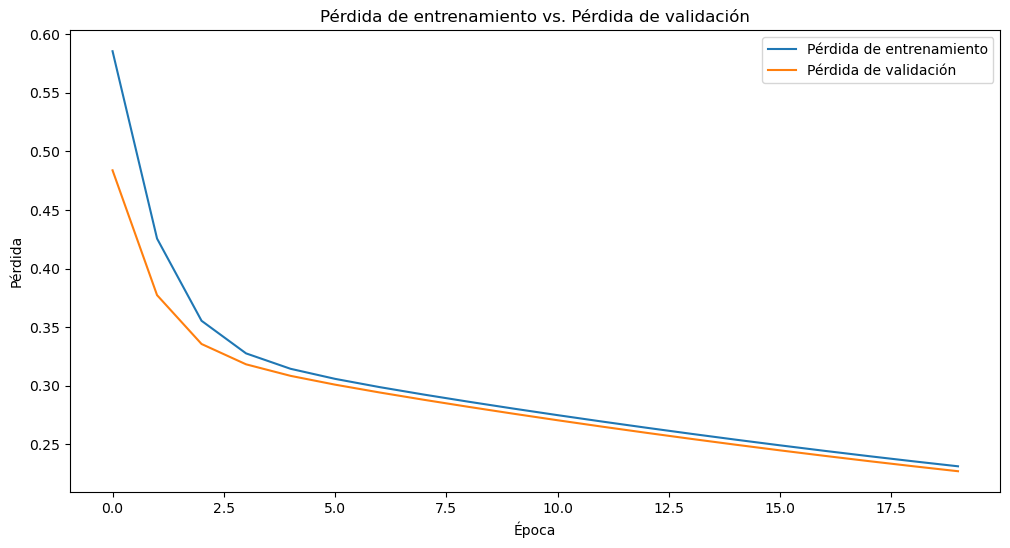

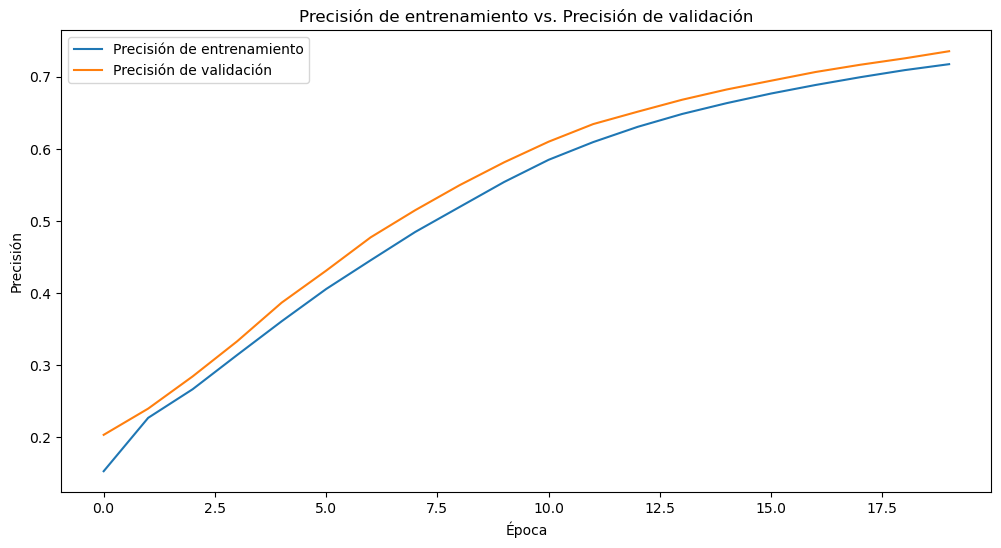

In [23]:
# Grafica la pérdida de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs. Pérdida de validación')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend()
plt.show()

# Grafica la precisión de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión de entrenamiento vs. Precisión de validación')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend()
plt.show()

**Comentario Exp I**: La eficacia no mejoró pero el si el tiempo de ejecución.

## 2er Experimento:
- Función para la capa oculta: relu.
- Neuronas ocultas: 100
- Incrementamos el tamaño del LearningRate (0.001 -> 0.01)
- Se aumentaron las epocas (15 ->20)
- Dismunimos el tamaño del minibatch. (70 -> 30)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 100)               78500     
                                                                 
 dense_56 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
2000/2000 [==============================] - 7s 3ms/step - loss: 0.2880 - accuracy: 0.5556 - val_loss: 0.2089 - val_accuracy: 0.7624
Epoch 2/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1789 - accuracy: 0.7866 - val_loss: 0.1514 - val_accuracy: 0.8248
Epoch 3/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1400 - accuracy: 0.8312 - val_loss: 0.1248 - 

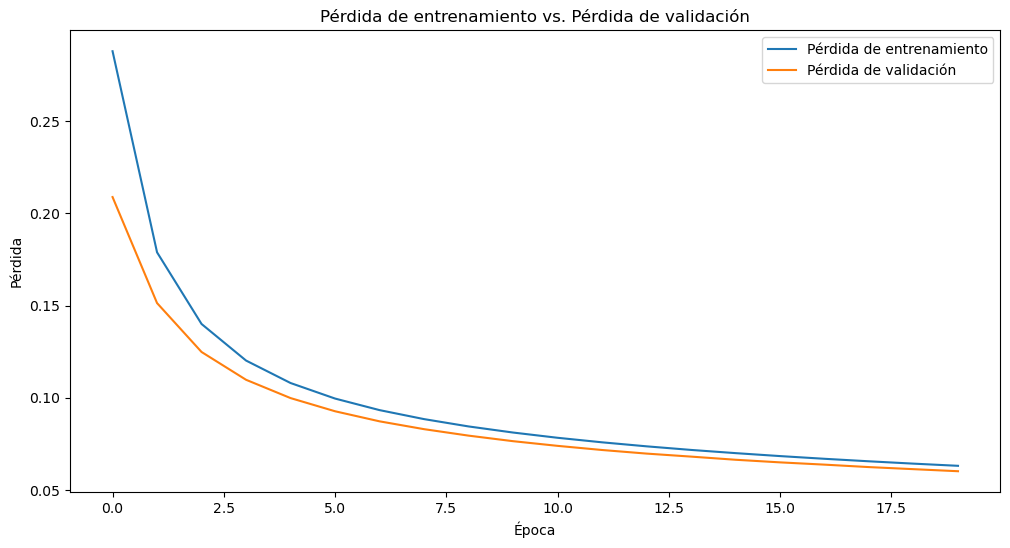

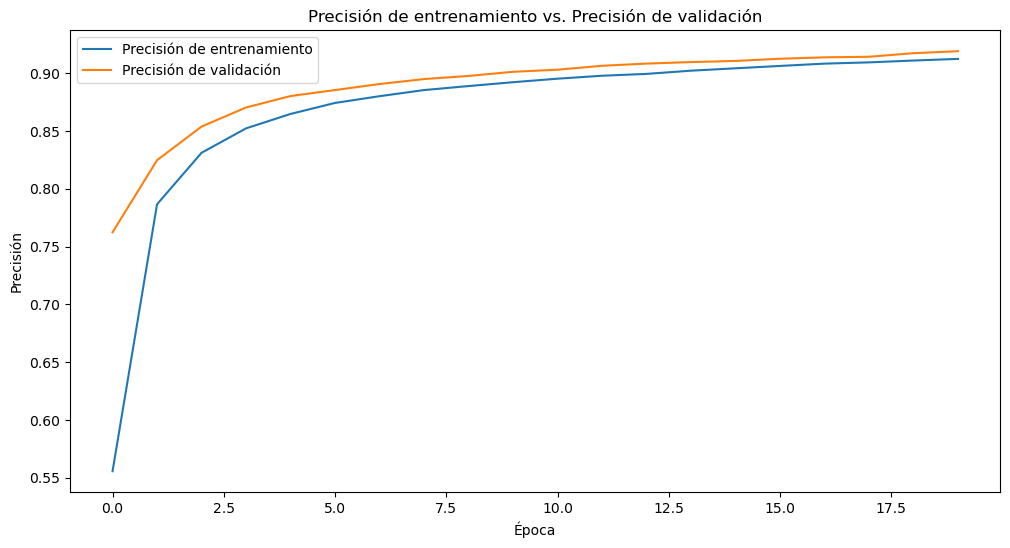

In [39]:
learning_rate = 0.01
epochs = 20
batch_size = 30
# neuronas = 50

dataset = mnist.load_data()
(x_train, y_train), (x_test, y_test) = dataset

x_trainv = x_train.reshape(60000, 784)
x_testv = x_test.reshape(10000, 784)
x_trainv = x_trainv.astype('float32')
x_testv = x_testv.astype('float32')

x_trainv /= 255 #estaba dividiendo /225
x_testv /= 255

num_classes = 10
y_trainc = keras.utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.to_categorical(y_test, num_classes)
 
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=learning_rate), metrics=['accuracy'])

inicio = time.time()
history = model.fit(x_trainv, y_trainc,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )
fin = time.time()
test_loss, test_acc = model.evaluate(x_testv, y_testc, verbose=0)
print("Efectividad del modelo: ", round((test_acc * 100), 2), "%")
print("Tiempo entrenando: ",round(fin-inicio, 4),"s")

# Grafica la pérdida de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs. Pérdida de validación')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend()
plt.show()

# Grafica la precisión de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión de entrenamiento vs. Precisión de validación')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend()
plt.show()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 100)               78500     
                                                                 
 dense_52 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0447 - accuracy: 0.9330 - val_loss: 0.0327 - val_accuracy: 0.9519
Epoch 2/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0287 - accuracy: 0.9616 - val_loss: 0.0284 - val_accuracy: 0.9602
Epoch 3/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0248 - accuracy: 0.9672 - val_loss: 0.0284 - 

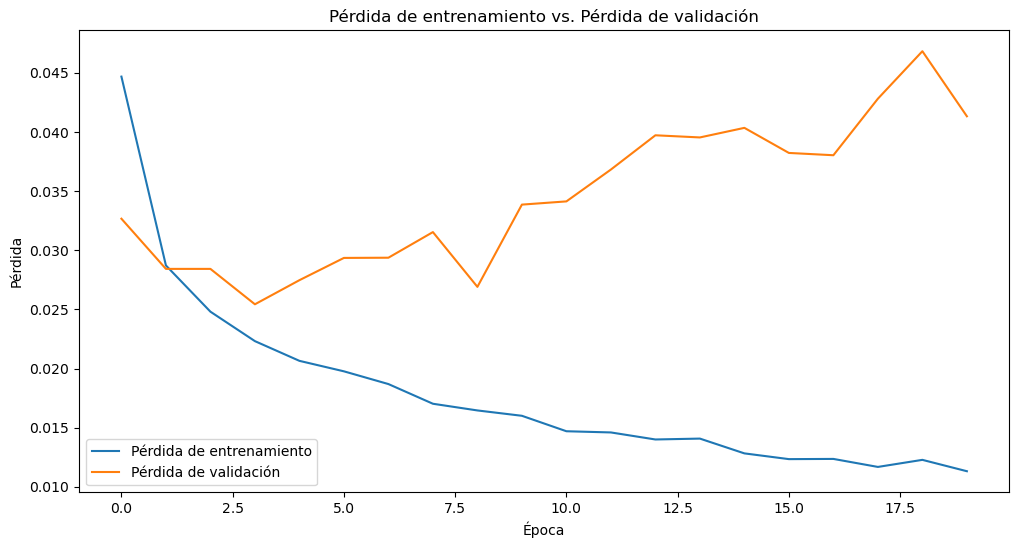

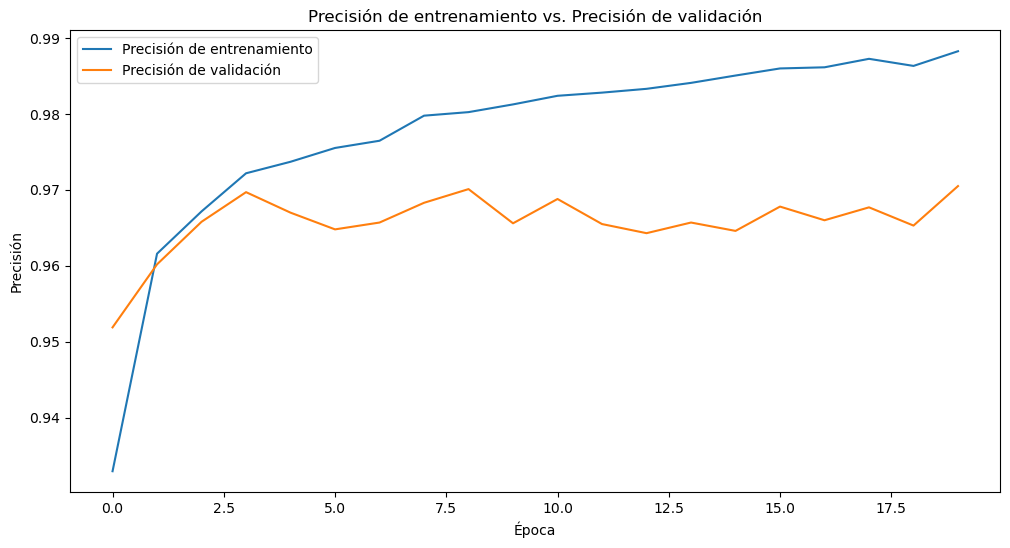

In [37]:
learning_rate = 0.01
epochs = 20
batch_size = 30
# neuronas = 100

dataset = mnist.load_data()
(x_train, y_train), (x_test, y_test) = dataset

x_trainv = x_train.reshape(60000, 784)
x_testv = x_test.reshape(10000, 784)
x_trainv = x_trainv.astype('float32')
x_testv = x_testv.astype('float32')

x_trainv /= 255 #estaba dividiendo /225
x_testv /= 255

num_classes = 10
y_trainc = keras.utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.to_categorical(y_test, num_classes)
 
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

inicio = time.time()
history = model.fit(x_trainv, y_trainc,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )
fin = time.time()
test_loss, test_acc = model.evaluate(x_testv, y_testc, verbose=0)
print("Efectividad del modelo: ", round((test_acc * 100), 2), "%")
print("Tiempo entrenando: ",round(fin-inicio, 4),"s")

# Grafica la pérdida de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs. Pérdida de validación')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend()
plt.show()

# Grafica la precisión de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión de entrenamiento vs. Precisión de validación')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend()
plt.show()

**Comentario Exp II**: Vemos que mejora la efectividad de ambos pero usar el optimizador Adam echa a perder la red mandandola a sobreajustar brutalmente. Por lo que nos quedamos con la red sin el Adam para este ejercicio del experimento.